In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('cardiotocography2', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('cardiotocography2', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('cardiotocography2')
num_tries = 15

dataset_shapes

([21], [3])

In [3]:
# Shape
def get_dims(x, i, o):
    return i - x * (i - o) / 4

for x in range(1,4):
    print(f'{get_dims(x, dataset_shapes[0][0], dataset_shapes[1][0]):.2f}')

16.50
12.00
7.50


### S(X,X,X)

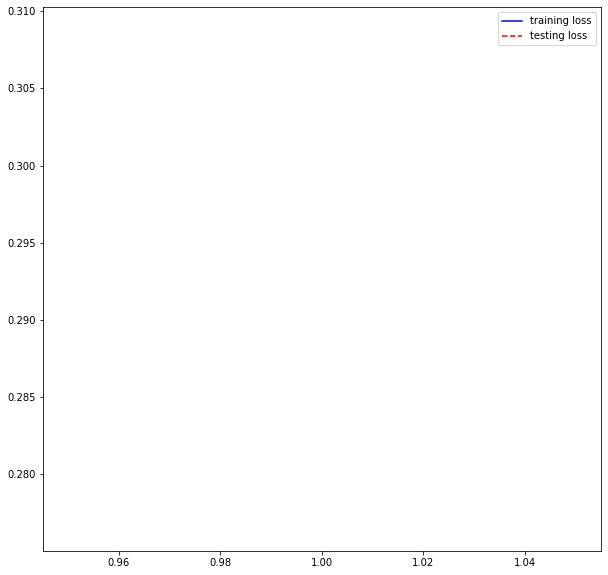

Elapsed training time: 2.38112 sec
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 17)                374       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                216       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [4]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[17,12,8], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(2)

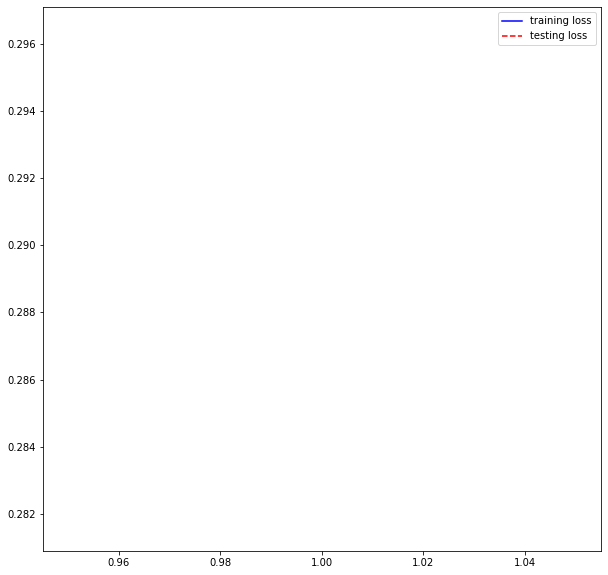

Elapsed training time: 1.00891 sec
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
v_input_4 (VInput)           (None, 22, 9)             198       
_________________________________________________________________
v_fractal_4 (VFractal)       (None, 10, 3)             507       
_________________________________________________________________
v_output_5 (VOutput)         (None, 3)                 0         
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(9,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(3)

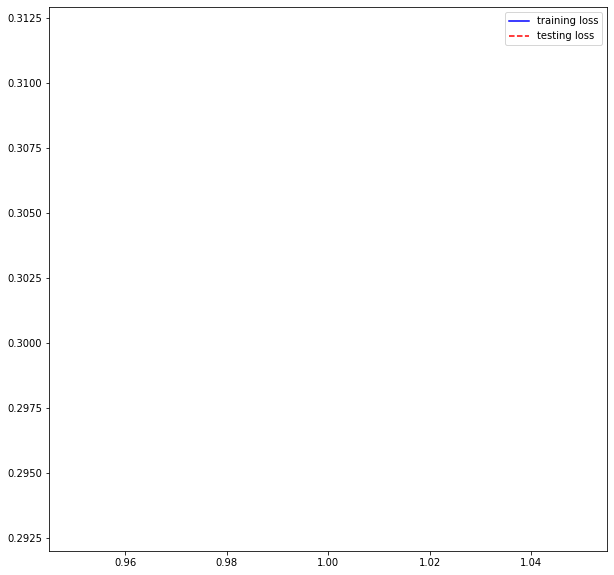

Elapsed training time: 0.96953 sec
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
v_input_8 (VInput)           (None, 22, 7)             154       
_________________________________________________________________
v_fractal_8 (VFractal)       (None, 8, 3)              570       
_________________________________________________________________
v_output_9 (VOutput)         (None, 3)                 0         
Total params: 724
Trainable params: 724
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(7,), inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(4)

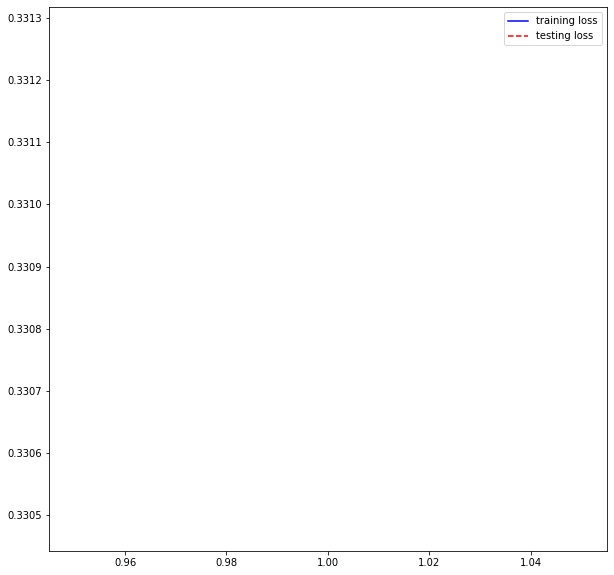

Elapsed training time: 0.81171 sec
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
v_input_14 (VInput)          (None, 22, 6)             132       
_________________________________________________________________
v_fractal_14 (VFractal)      (None, 7, 3)              639       
_________________________________________________________________
v_output_15 (VOutput)        (None, 3)                 0         
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(6,), inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(5)

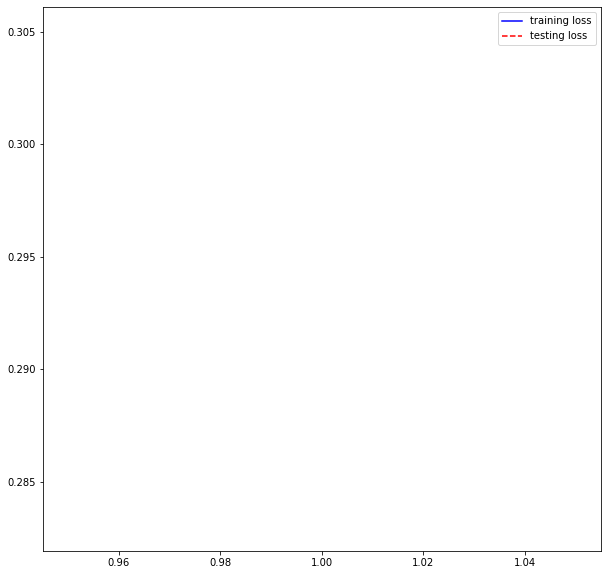

Elapsed training time: 0.84607 sec
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
v_input_20 (VInput)          (None, 22, 5)             110       
_________________________________________________________________
v_fractal_20 (VFractal)      (None, 6, 3)              658       
_________________________________________________________________
v_output_21 (VOutput)        (None, 3)                 0         
Total params: 768
Trainable params: 768
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)